# Midterm 1 (40 points)

## Tuesday, October 15, 1530 - 1730

Instructions: Complete all questions to the best of your abilities. Unlike your assignments, carefully commenting your code and providing evidence for testing is not required; you don't have time for that! Instead, spend your time coding, generating results, and discussing them. Don't panic and try to have some fun!

## John Ming Ngo, 30020834

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

Earlier in the term, we considered the statistics of flipping a coin many many times. We had assumed that the coin was fair, i.e. that the probability of heads was the same as tails. Now let's consider flipping an unfair, or biased, coin where the probability of getting heads is $p$, while the probability of getting tails is evidently $q=1-p$. We can think of heads as bit value 1 while tails is bit value 0 (or the other way around, it's up to you!).

### 1 (10 points): Entropy of the biased coin
Write a Python program to randomly flip the biased coin $N$ times, for $0.05\leq p\leq 0.5$ in $0.05$ increments. Obtain the Shannon entropy of the resulting $N$-digit bit strings, and compare to the theoretical values. Be sure choose $N$ sufficiently large that you obtain a good sample size.

### 2 (30 points): Biased coin distribution functions. 

**(a) (10 points)** By randomly flipping the biased coin (not using the theoretical function!), calculate the macrostate probability $P(n)$, where $n$ is the number of heads and $N=200$ is the total number of flips, again for $0.05\leq p\leq 0.5$ in $0.05$ increments. Plot the probabilities as a function of $n$, for all values of $p$ all on the same figure. Comment on the qualitative features of the distribution functions and interpret in the context of entropy. 

**(b) (5 points)** Calculate the means and widths of the distribution functions for the results found in (a), and compare these with the theoretical values.

**(c) (10 points)** Repeat the calculations in (b), but now for $p\ll 1$, in particular the range $0.01\leq p\leq 0.1$ in intervals of $0.01$. Plot the distribution width as a function of $p$ for this range on a log-log scale, and find the best fit. Comment on the results.

**(d) (5 points)** The Poisson distribution 
$$P(n)=\frac{\overline{n}^ne^{-\overline{n}}}{n!}$$
applies when $p\ll 1$, such as considered in (c). In this expression, $\overline{n}=Np$ is the mean value of the distribution function. (Note: in Python $n!$ can be evaluated using math.factorial(n), so you'll need to import math). For $p=0.05$, compare visually the normal distribution function to the Poisson distribution function. Interpret the shape.

### 1 (10 points): Entropy of the biased coin
Write a Python program to randomly flip the biased coin $N$ times, for $0.05\leq p\leq 0.5$ in $0.05$ increments. Obtain the Shannon entropy of the resulting $N$-digit bit strings, and compare to the theoretical values. Be sure choose $N$ sufficiently large that you obtain a good sample size.

In [104]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

In [105]:
"""
Feder's Code
"""
def symbol_entropy(datalist):
  
# Estimate the Shannon entropy for a sequence of symbols.

  hist = {}
  for item in datalist:
   if item not in hist:
     hist[item] = 1
   else:
     hist[item] += 1
    
  counts = np.array( [hist[item] for item in hist])
  prob = counts / np.sum(counts)
  prob = prob[ prob != 0 ] #; print(prob)
  entropy = -np.sum( prob * np.log2(prob) )
  
  return entropy

In [106]:
"""
1 is head, 0 is tails
Biased flip
"""
def bFlip(pHead):
    return (1 if rand.random() < pHead else 0)
"""
List of bias flip results
"""
def manyBFlip(pHead, iters):
    res = []
    for i in range(iters):
        res.append(bFlip(pHead))
    return res

In [107]:
"""
Our set variables
"""
pHead = [x*0.05 for x in range(1, 11)] #P from 0.05 to 0.5 in 0.05 increments
iters = 10000

"""
Find our expected entropy.
"""
sEntropies = []
for prob in pHead:
    res = manyBFlip(prob, iters)
    sEnt = symbol_entropy(res)
    #print(res)
    #print(sEnt)
    sEntropies.append(sEnt)
print(sEntropies)

[0.290207860300911, 0.4712106218705926, 0.6040544980965028, 0.7257118579402129, 0.8011392980163472, 0.8716738043410103, 0.9228919718923305, 0.972904754541793, 0.9943300189935504, 0.9999906513159418]


In [117]:
#theoretical shannon entropy values (Comes from the equation):
def shannonExpected(pHead):
    return (-1)*((pHead * np.log2(pHead)) + ((1-pHead) * np.log2((1-pHead))))


In [118]:
theoreticalShannon = []
for entry in pHead:
    theoreticalShannon.append(shannonExpected(entry))
print(theoreticalShannon)

[0.28639695711595625, 0.4689955935892812, 0.6098403047164005, 0.7219280948873623, 0.8112781244591328, 0.8812908992306927, 0.9340680553754911, 0.9709505944546686, 0.9927744539878083, 1.0]


In [182]:
print("Let's recap what I found:")
print()

print("Our attained entropies were:")
print(sEntropies)

print()

print("The theoretical entropies were:")
print(theoreticalShannon)

print()

print("The total difference between the two was:")
print(np.sum(np.abs(np.abs(np.array(theoreticalShannon)) - np.abs(np.array(sEntropies)))))

Let's recap what I found:

Our attained entropies were:
[0.290207860300911, 0.4712106218705926, 0.6040544980965028, 0.7257118579402129, 0.8011392980163472, 0.8716738043410103, 0.9228919718923305, 0.972904754541793, 0.9943300189935504, 0.9999906513159418]

The theoretical entropies were:
[0.28639695711595625, 0.4689955935892812, 0.6098403047164005, 0.7219280948873623, 0.8112781244591328, 0.8812908992306927, 0.9340680553754911, 0.9709505944546686, 0.9927744539878083, 1.0]

The total difference between the two was:
0.05004657973156784


#### As we can see, the entropies of our simulated unfair coin was extremely close to the theoretical values of entropy given the probabilities for the Shannon encoding. The difference between the theoretical and actual results, all added up, was extremely small, indicating that our simulation was correct.

### 2 (30 points): Biased coin distribution functions. 

**(a) (10 points)** By randomly flipping the biased coin (not using the theoretical function!), calculate the macrostate probability $P(n)$, where $n$ is the number of heads and $N=200$ is the total number of flips, again for $0.05\leq p\leq 0.5$ in $0.05$ increments. Plot the probabilities as a function of $n$, for all values of $p$ all on the same figure. Comment on the qualitative features of the distribution functions and interpret in the context of entropy. 

**(b) (5 points)** Calculate the means and widths of the distribution functions for the results found in (a), and compare these with the theoretical values.

**(c) (10 points)** Repeat the calculations in (b), but now for $p\ll 1$, in particular the range $0.01\leq p\leq 0.1$ in intervals of $0.01$. Plot the distribution width as a function of $p$ for this range on a log-log scale, and find the best fit. Comment on the results.

**(d) (5 points)** The Poisson distribution 
$$P(n)=\frac{\overline{n}^ne^{-\overline{n}}}{n!}$$
applies when $p\ll 1$, such as considered in (c). In this expression, $\overline{n}=Np$ is the mean value of the distribution function. (Note: in Python $n!$ can be evaluated using math.factorial(n), so you'll need to import math). For $p=0.05$, compare visually the normal distribution function to the Poisson distribution function. Interpret the shape.

In [147]:
def manyBFlipSum(pHead, iters):
    res = []
    for i in range(iters):
        res.append(bFlip(pHead))
    return sum(res)

def macroBFlip(pHead, N, numIter):
    res = []
    for i in range(numIter):
        res.append(manyBFlipSum(pHead, N))
    return res

def normalize(lst):
    return np.array(lst)/sum(lst)

In [191]:
def itemCount(aList):
  aDict = {}
  for entry in aList:
    aDict[entry] = 1 if entry not in aDict.keys() else aDict[entry] + 1
  return aDict

def toList(aDict):
  result = []
  resultX = []
  resultY = []
  for key, value in aDict.items():
    result.append((key, value))
    resultX.append(key)
    resultY.append(value)
  return result, resultX, resultY

def srtFst(aList):
  if (aList == []): return []
  lst = aList
  fstEntry = lst.pop()
  return srtFst([x for x in lst if x[0] < fstEntry[0]]) + [fstEntry] + srtFst([x for x in lst if x[0] >= fstEntry[0]])

def unzip(lst):
  x = []
  y = []
  for entry in lst:
    x.append(entry[0])
    y.append(entry[1])
  return x, y


**(a) (10 points)** By randomly flipping the biased coin (not using the theoretical function!), calculate the macrostate probability $P(n)$, where $n$ is the number of heads and $N=200$ is the total number of flips, again for $0.05\leq p\leq 0.5$ in $0.05$ increments. Plot the probabilities as a function of $n$, for all values of $p$ all on the same figure. Comment on the qualitative features of the distribution functions and interpret in the context of entropy. 

In [192]:
#Q1
numIter = 30000
N = 200
pHead = [x*0.05 for x in range(1, 11)] #P from 0.05 to 0.5 in 0.05 increments

Xs = []
Ys = []
Ynorm = []
rawRes = []
for p in pHead:
    res = macroBFlip(p, N, numIter)
    rawRes.append(res)
    
    numItems = itemCount(res)
    numItems, itemsX, itemsY = toList(numItems)
    
    sortedItems = srtFst(numItems)
    resX, resY = unzip(sortedItems)
    resYnormed = normalize(resY)
    
    Xs.append(resX)
    Ys.append(resY)
    Ynorm.append(resYnormed)

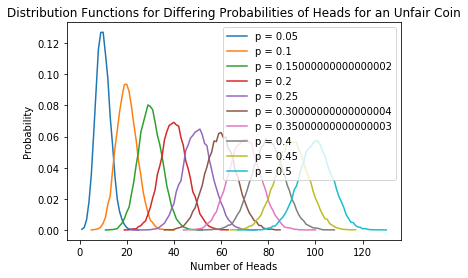

In [193]:
plt.title("Distribution Functions for Differing Probabilities of Heads for an Unfair Coin")
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
for i in range(len(pHead)):
    plt.plot(Xs[i], Ynorm[i], label = "p = {}".format(pHead[i]))
plt.legend()

#### As we can see from our above graph, as the probability of getting a head increases, the graphs are placed with a mean further to the right, and with a larger width, along with a smaller height. This is because as the probabilities become more balanced, the entropy increases. That is, a wider width of distributions means you're more likely to get results all over the place, meaning that your randomness is higher, meaning that your entropy is higher as per the Shannon entropy equation. Alternatively, you can see it as that 0.5log(0.5) + 0.5log(0.5) > 0.9log(0.9) + 0.1log(0.1) , as the bigger 0.9log(0.9) term just doesn't counteract the smaller size of the 0.1 term, and as such more balanced probabilities have higher entropies which translate to a wider curve.

In [194]:
## I can prove that by just finding their entropies. Ready?
entropies = []
for result in rawRes:
    entropies.append(symbol_entropy(result))
print(entropies)

[3.6642940119830154, 4.13175852435907, 4.377084077637095, 4.550153384264783, 4.6622155896032815, 4.746987469891013, 4.7962162158292365, 4.844154901974083, 4.856176314142288, 4.863475103561228]


#### The above list, ordered from lowest p to highest p, shows that as our probabilities of getting a head increase, up to 0.5 at least,  have greater entropies, and that greater entropies corrispond to a lower and wider graph as above.

**(b) (5 points)** Calculate the means and widths of the distribution functions for the results found in (a), and compare these with the theoretical values.

In [195]:
#Q2
#Means:
means = []
for entry in rawRes:
    means.append(np.mean(entry))
    
widths = []
#Width of a Gaussian is its standard deviation
for entry in rawRes:
    widths.append(np.std(entry))

In [196]:
print("The means were:")
print(means)

print()

print("The widths were:")
print(widths)

The means were:
[10.004433333333333, 20.021533333333334, 29.938233333333333, 40.044866666666664, 49.96296666666667, 59.987066666666664, 69.94406666666667, 80.0061, 90.0193, 100.00923333333333]

The widths were:
[3.093651619939704, 4.2582942182156565, 5.038923649506465, 5.678056033146869, 6.135193167202552, 6.50624054752222, 6.730072173626538, 6.957575927720803, 7.0140711556603605, 7.052679023762689]


The standard deviation, the square root of the variance, is therefore
$\Delta n_1=\sqrt{Npq}=\sqrt{N}/2$ for a fair coin.

In [197]:
#Theoretical values: For a coin over a number of throws, it is probability result * num throws.
def theoreticalMean(pHead, numThrows):
    return (pHead * numThrows)
 
#Theoretical width is a gaussian, scaling as N^(1/2). Actually, see the markup code above. It's sqrt(Npq)
def theoreticalWidth(pHead, numThrows):
    return np.sqrt(numThrows * pHead * (1-pHead))

In [198]:
theoreticalMeans = []
for entry in pHead:
    theoreticalMeans.append(theoreticalMean(entry, N))

theoreticalWidths = []
for entry in pHead:
    theoreticalWidths.append(theoreticalWidth(entry, N))
    
print("Theoretical means were:")
print(theoreticalMeans)

print()

print("Theoretical widths were:")
print(theoreticalWidths)

Theoretical means were:
[10.0, 20.0, 30.000000000000004, 40.0, 50.0, 60.00000000000001, 70.0, 80.0, 90.0, 100.0]

Theoretical widths were:
[3.082207001484488, 4.242640687119285, 5.04975246918104, 5.656854249492381, 6.123724356957945, 6.48074069840786, 6.74536878161602, 6.928203230275509, 7.035623639735145, 7.0710678118654755]


In [199]:
print("To Recap:")
print()

print("The experimental means were:")
print(means)

print()

print("The theoretical widths were:")
print(widths)


print("The experimental means were:")
print(theoreticalMeans)

print()

print("The theoretical widths were:")
print(theoreticalWidths)

print()

print("The total difference between the experimental and theoretical means were:")
print(np.sum(np.abs(np.abs(np.array(means)) - np.abs(np.array(theoreticalMeans)))))

print()

print("The total difference between the experimental and theoretical widths were:")
print(np.sum(np.abs(np.abs(np.array(widths)) - np.abs(np.array(theoreticalWidths)))))


To Recap:

The experimental means were:
[10.004433333333333, 20.021533333333334, 29.938233333333333, 40.044866666666664, 49.96296666666667, 59.987066666666664, 69.94406666666667, 80.0061, 90.0193, 100.00923333333333]

The theoretical widths were:
[3.093651619939704, 4.2582942182156565, 5.038923649506465, 5.678056033146869, 6.135193167202552, 6.50624054752222, 6.730072173626538, 6.957575927720803, 7.0140711556603605, 7.052679023762689]
The experimental means were:
[10.0, 20.0, 30.000000000000004, 40.0, 50.0, 60.00000000000001, 70.0, 80.0, 90.0, 100.0]

The theoretical widths were:
[3.082207001484488, 4.242640687119285, 5.04975246918104, 5.656854249492381, 6.123724356957945, 6.48074069840786, 6.74536878161602, 6.928203230275509, 7.035623639735145, 7.0710678118654755]

The total difference between the experimental and theoretical means were:
0.2731333333333392

The total difference between the experimental and theoretical widths were:
0.1807079898519639


#### As we can see from the total differences between the theoretical and experimental values being tiny, our experimental means and widths are very close to the theoretical means and widths, confirming that we did what we wanted to do.

**(c) (10 points)** Repeat the calculations in (b), but now for $p\ll 1$, in particular the range $0.01\leq p\leq 0.1$ in intervals of $0.01$. Plot the distribution width as a function of $p$ for this range on a log-log scale, and find the best fit. Comment on the results.

In [208]:
#Q3
pHead = [x*0.01 for x in range(1, 11)] #P from 0.01 to 0.1 in 0.01 increments

numIter = 30000
N = 200

Xs = []
Ys = []
Ynorm = []
rawRes = []
for p in pHead:
    res = macroBFlip(p, N, numIter)
    rawRes.append(res)
    
    numItems = itemCount(res)
    numItems, itemsX, itemsY = toList(numItems)
    
    sortedItems = srtFst(numItems)
    resX, resY = unzip(sortedItems)
    resYnormed = normalize(resY)
    
    Xs.append(resX)
    Ys.append(resY)
    Ynorm.append(resYnormed)

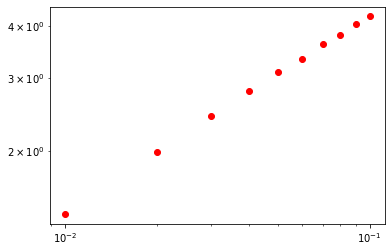

In [209]:
#Widths
widths = []
#Width of a Gaussian is its standard deviation
for entry in rawRes:
    widths.append(np.std(entry))
    
#plotData = zip(pHead, widths)

plt.loglog(pHead, widths, 'ro')

#### This looks very linear! However, note that we are looking at an extremely small portion of the domain; for sufficiently small portions of the domain of any smooth graph, it will start to look linear. That said, let's find a relevant linear line of best fit.

log(prob) prefactor (m term): 0.4764614356256646
b term from mx + b: 2.547294026577406


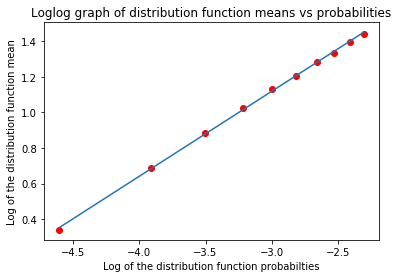

In [211]:
#Finding best fit
fits = np.polyfit(np.log(pHead), np.log(widths), 1)

#Original
plt.plot(np.log(pHead), np.log(widths), 'ro')

#Fit
plt.title("Loglog graph of distribution function means vs probabilities")
plt.plot(np.log(pHead), np.log(pHead) * fits[0] + fits[1])
plt.xlabel("Log of the distribution function probabilties")
plt.ylabel("Log of the distribution function mean")

print("log(prob) prefactor (m term): {}".format(fits[0]))
print("b term from mx + b: {}".format(fits[1]))

#### As expected, we got a good linear fit. It appears that this region of probabilities can indeed be probably approximated with a linear fit. However, note the devication like a curve near the top - it's not massive, but it's also our first hint that for the whole range of probabilities it probably isn't a straight up linear fit. In fact, I'll show it below. Not strictly necessary though.

In [212]:
#Q3 - Showing that the whole thing isn't really linear
pHead = [x*0.1 for x in range(1, 10)] #P from 0.1 to 0.9 in 0.1 increments

numIter = 30000
N = 200

Xs = []
Ys = []
Ynorm = []
rawRes = []
for p in pHead:
    res = macroBFlip(p, N, numIter)
    rawRes.append(res)
    
    numItems = itemCount(res)
    numItems, itemsX, itemsY = toList(numItems)
    
    sortedItems = srtFst(numItems)
    resX, resY = unzip(sortedItems)
    resYnormed = normalize(resY)
    
    Xs.append(resX)
    Ys.append(resY)
    Ynorm.append(resYnormed)

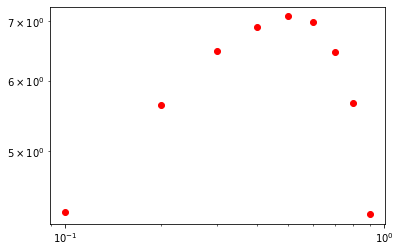

In [213]:
#Widths
widths = []
#Width of a Gaussian is its standard deviation
for entry in rawRes:
    widths.append(np.std(entry))
    
#plotData = zip(pHead, widths)

plt.loglog(pHead, widths, 'ro')

### See? Big scale distribution width with probs from 0 to 0.9 not linear! Only for our region 0.01-0.10, and even then it is an approximation!

**(d) (5 points)** The Poisson distribution 
$$P(n)=\frac{\overline{n}^ne^{-\overline{n}}}{n!}$$
applies when $p\ll 1$, such as considered in (c). In this expression, $\overline{n}=Np$ is the mean value of the distribution function. (Note: in Python $n!$ can be evaluated using math.factorial(n), so you'll need to import math). For $p=0.05$, compare visually the normal distribution function to the Poisson distribution function. Interpret the shape.

In [214]:
#Q4
import math

def poissonProb(n, mean):
    fac = math.factorial(n)
    nBar = mean
    expN = np.exp(-nBar)
    nBarn = nBar**n
    #print(nBarn)
    return (nBarn * expN) / fac

In [215]:
#From Q1, modified
numIter = 30000
N = 200
pHead = [x*0.05 for x in range(1, 11)] #P from 0.05 to 0.5 in 0.05 increments

Xs = []
Ys = []
Ynorm = []
rawRes = []
for p in pHead:
    res = macroBFlip(p, N, numIter)
    rawRes.append(res)
    
    numItems = itemCount(res)
    numItems, itemsX, itemsY = toList(numItems)
    
    sortedItems = srtFst(numItems)
    resX, resY = unzip(sortedItems)
    resYnormed = normalize(resY)
    
    Xs.append(resX)
    Ys.append(resY)
    Ynorm.append(resYnormed)

means = []
for entry in rawRes:
    means.append(np.mean(entry))

poissonDistributions = []
i = 0
for entry in Xs:
    poisson = []
    for value in entry:
        mean = means[i]
        poisson.append(poissonProb(value, mean))
    i += 1
    poissonDistributions.append(poisson) 
    if i > 0: break; #Extreme patchwork code sorry.This should get us just p = 0.05

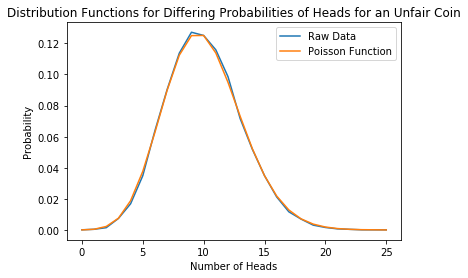

In [216]:
plt.title("Distribution Functions for Differing Probabilities of Heads for an Unfair Coin")
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.plot(Xs[0], Ynorm[0], label = "Raw Data")
plt.plot(Xs[0], poissonDistributions[0], label = "Poisson Function")
plt.legend()

#### As we can see from our results above, the poisson distribution approximation for the probabilities is basically bang on! The poisson distribution is also a gaussian, which appears to have a slightly lower height and a slightly higher standard deviation than our data, as the graph's interweaving of our data shows, but is otherwise extremely close to the results attained by our raw data.

#### As for why it is that our raw data is basically a poisson distribution/such a distribution models our data well, the poisson distribution is an aggregate over some time or area of an unlikely event, or an event known to occur some amount of times per time/area on average, which is basically what seeing a head with probability 0.05 over hundreds of flips is.